# Brain Tumor Detection YOLOv8

## Install And Import Essential Libreries

In [1]:
# Install Essential Libraries
%pip install ultralytics --quiet
%pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 522.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.7/871.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00


In [2]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from roboflow import Roboflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython import display

# Suppress warnings
warnings.filterwarnings('ignore')

## Loading Data

In [3]:
rf = Roboflow(api_key="your api key here")
project = rf.workspace("isr1").project("brain-tumor-detection-9jhkw")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.89, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Brain-Tumor-Detection-2 in yolov8:: 100%|██████████| 4812/4812 [00:00<00:00, 6828.65it/s]


In [5]:
%%bash
cat <<EOF > /content/Brain-Tumor-Detection-2/data.yaml
path: /content/Brain-Tumor-Detection-2

train: train/images
val: valid/images
test: test/images

nc: 4
names:
  0: Glioma
  1: Meningioma
  2: No-Tumor
  3: Pituitary
EOF

## Loading YOLOv8 Pre-trained Model

In [6]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 267MB/s]


## Train and Fine-tuning YOLOv8

In [7]:
# Train the model on our custom dataset
results = model.train(
    data='/content/Brain-Tumor-Detection-2/data.yaml',
    epochs=30,
    batch=32,
    name='train',
    optimizer='Adam',
    lr0=0.001,
    lrf=0.001,
    momentum=0.85,
    dropout=0.5
)

Ultralytics YOLOv8.2.89 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Brain-Tumor-Detection-2/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=YOLOv8n, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 89.2MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Brain-Tumor-Detection-2/train/labels... 1690 images, 56 backgrounds, 0 corrupt: 100%|██████████| 1690/1690 [00:01<00:00, 1585.22it/s]


train: New cache created: /content/Brain-Tumor-Detection-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 405, len(boxes) = 1685. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Brain-Tumor-Detection-2/valid/labels... 356 images, 16 backgrounds, 0 corrupt: 100%|██████████| 356/356 [00:00<00:00, 1315.97it/s]

val: New cache created: /content/Brain-Tumor-Detection-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 81, len(boxes) = 347. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/YOLOv8n/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.85) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOv8n
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.49G      1.175      2.597      1.405         45        640: 100%|██████████| 53/53 [00:34<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

                   all        356        347     0.0484       0.25      0.166     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.95G      1.116      1.364      1.333         47        640: 100%|██████████| 53/53 [00:30<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        356        347      0.627       0.42      0.587      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.95G      1.085      1.159      1.311         40        640: 100%|██████████| 53/53 [00:40<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.11s/it]

                   all        356        347      0.629      0.541      0.593       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.95G      1.091      1.145      1.306         49        640: 100%|██████████| 53/53 [00:39<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        356        347      0.727      0.563      0.662      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.95G      1.082      1.072      1.308         52        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        356        347      0.686      0.767        0.8      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.95G      1.029     0.9588      1.252         60        640: 100%|██████████| 53/53 [00:34<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        356        347      0.759      0.643      0.749      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.95G      1.003     0.9258      1.248         51        640: 100%|██████████| 53/53 [00:38<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        356        347      0.832      0.805       0.87      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.95G       1.01     0.8953      1.249         44        640: 100%|██████████| 53/53 [00:36<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        356        347      0.704      0.778      0.863      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.95G     0.9975     0.8345      1.232         52        640: 100%|██████████| 53/53 [00:34<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]

                   all        356        347       0.78      0.781      0.839      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.95G     0.9882     0.8262      1.239         51        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        356        347      0.793      0.821      0.868      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.95G     0.9345     0.7726      1.218         48        640: 100%|██████████| 53/53 [00:30<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        356        347      0.819      0.787      0.854      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.95G     0.9514     0.7681      1.213         52        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

                   all        356        347      0.789      0.855      0.895      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.95G     0.9267     0.7309       1.19         52        640: 100%|██████████| 53/53 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        356        347      0.823      0.816      0.863      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.95G      0.927     0.7277      1.204         51        640: 100%|██████████| 53/53 [00:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]

                   all        356        347      0.801      0.787       0.87      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.95G     0.9049     0.7083      1.185         44        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        356        347      0.814      0.793      0.863       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.95G     0.8951     0.6965      1.177         48        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        356        347      0.783      0.801       0.86      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.95G      0.912      0.674      1.177         46        640: 100%|██████████| 53/53 [00:31<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        356        347      0.861      0.861      0.905      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.95G     0.8832     0.6464       1.17         48        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        356        347      0.863      0.853      0.908      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.95G     0.8781     0.6511       1.17         45        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        356        347      0.824      0.879      0.896      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.95G     0.8774     0.6242       1.16         52        640: 100%|██████████| 53/53 [00:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        356        347       0.86      0.867      0.919      0.651


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.09G     0.9596     0.5738      1.205         25        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        356        347      0.862      0.863      0.909      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.95G     0.9316     0.5507        1.2         27        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        356        347      0.865      0.855      0.905      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.95G     0.9225     0.5291      1.182         28        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        356        347      0.869      0.895      0.923      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.95G     0.8952     0.5067      1.172         29        640: 100%|██████████| 53/53 [00:30<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        356        347      0.849      0.913      0.927      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.95G     0.8808     0.4925       1.17         25        640: 100%|██████████| 53/53 [00:31<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        356        347      0.867      0.895      0.928      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.95G     0.8634     0.4606       1.15         26        640: 100%|██████████| 53/53 [00:34<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        356        347      0.849      0.925      0.927      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.95G     0.8426      0.453      1.145         24        640: 100%|██████████| 53/53 [00:31<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        356        347      0.871      0.906      0.927      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.95G     0.8333     0.4325      1.134         23        640: 100%|██████████| 53/53 [00:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        356        347      0.843      0.934      0.931      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.95G     0.8132      0.416      1.123         26        640: 100%|██████████| 53/53 [00:29<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        356        347      0.888       0.89      0.935      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.95G     0.7948     0.4068      1.111         26        640: 100%|██████████| 53/53 [00:29<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        356        347      0.869      0.901      0.935      0.663



30 epochs completed in 0.319 hours.
Optimizer stripped from runs/detect/YOLOv8n/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/YOLOv8n/weights/best.pt, 6.2MB

Validating runs/detect/YOLOv8n/weights/best.pt...
Ultralytics YOLOv8.2.89 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


                   all        356        347      0.843      0.914      0.927      0.666
                Glioma         80         83      0.816      0.856      0.885      0.529
            Meningioma         88         90      0.854      0.856      0.902      0.625
              No-Tumor         84         84      0.917      0.988       0.98       0.97
             Pituitary         88         90      0.785      0.956      0.941      0.541
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/YOLOv8n


## Model Performance Evaluation

In [9]:
# Define the path to the directory
post_training_files_path = '/content/runs/detect/train/'

# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.2.89 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Brain-Tumor-Detection-2/valid/labels.cache... 356 images, 16 backgrounds, 0 corrupt: 100%|██████████| 356/356 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 81, len(boxes) = 347. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.95it/s]


                   all        356        347       0.85      0.912      0.927      0.666
                Glioma         80         83      0.843      0.855      0.885       0.53
            Meningioma         88         90      0.855      0.851      0.902      0.628
              No-Tumor         84         84      0.918      0.988       0.98       0.97
             Pituitary         88         90      0.782      0.956       0.94      0.537
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


In [10]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

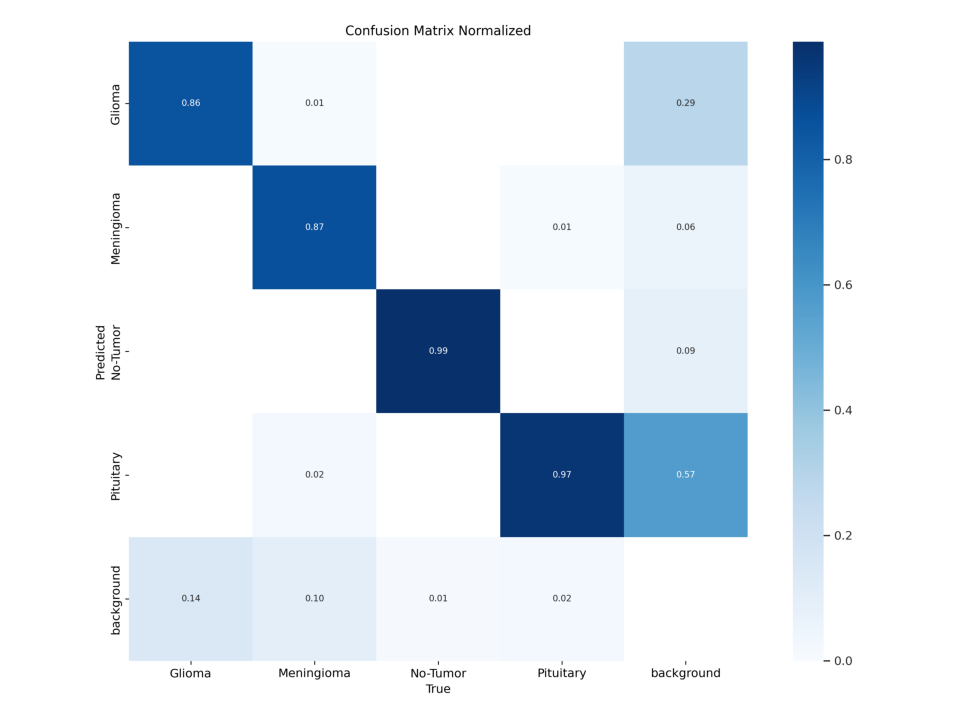

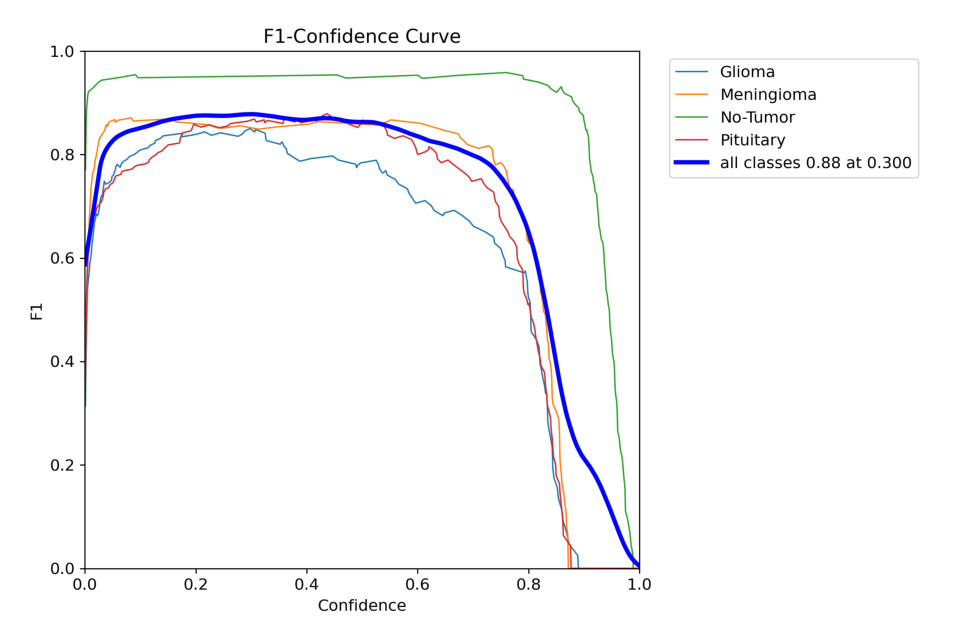

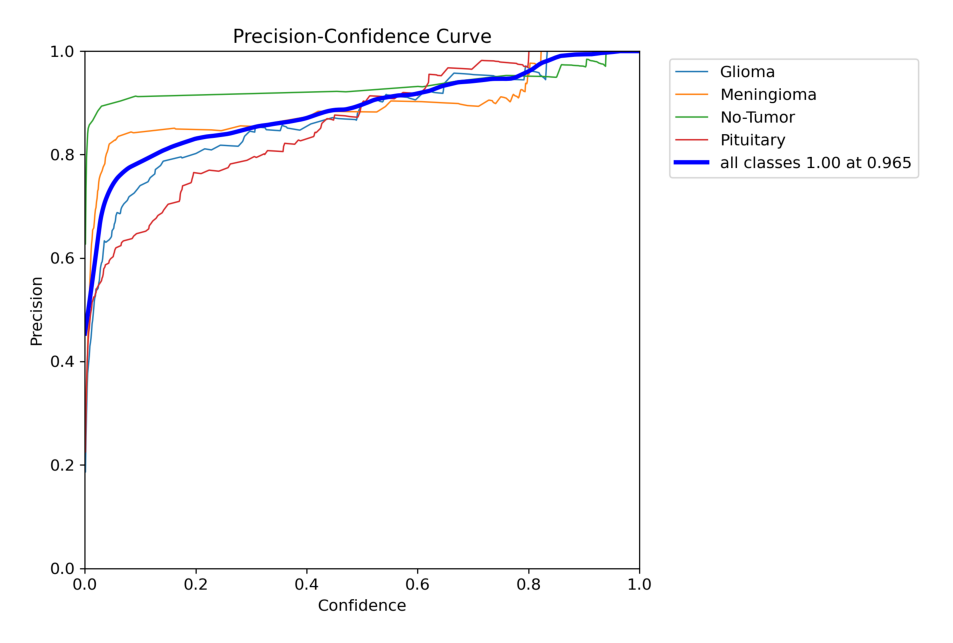

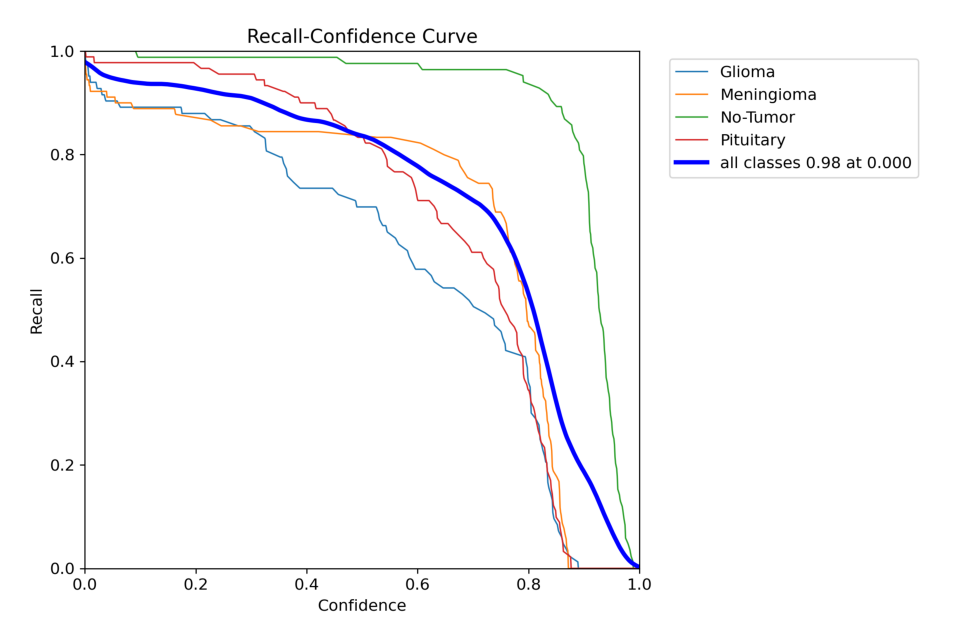

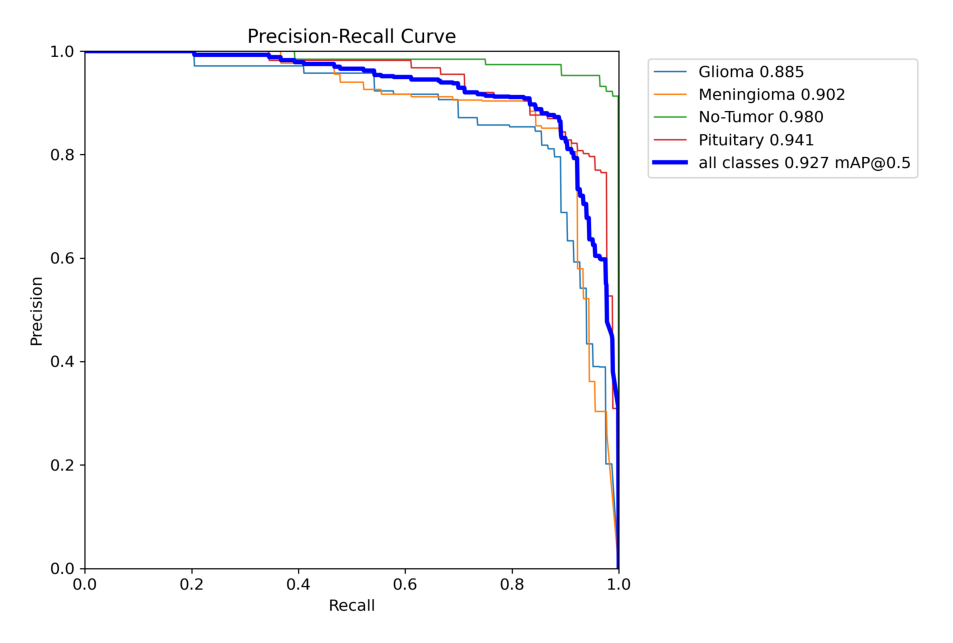

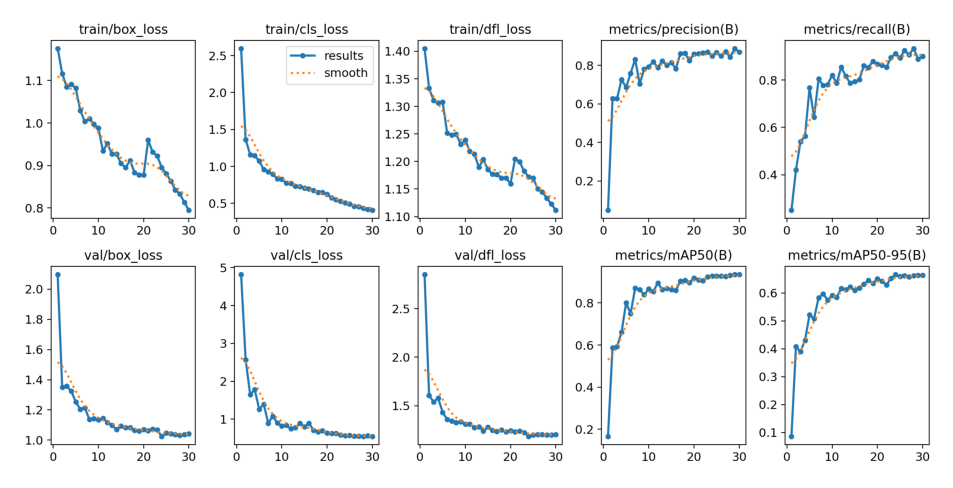

In [11]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#9b63b8'}, style='darkgrid')

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)


0: 640x640 1 Meningioma, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 No-Tumor, 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 No-Tumor, 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Pituitary, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.5ms
Speed: 2.1ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Meningiomas, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Pituitary, 7.5ms
Speed: 3.8ms preprocess, 7.5ms inference, 1.3ms postprocess per image a

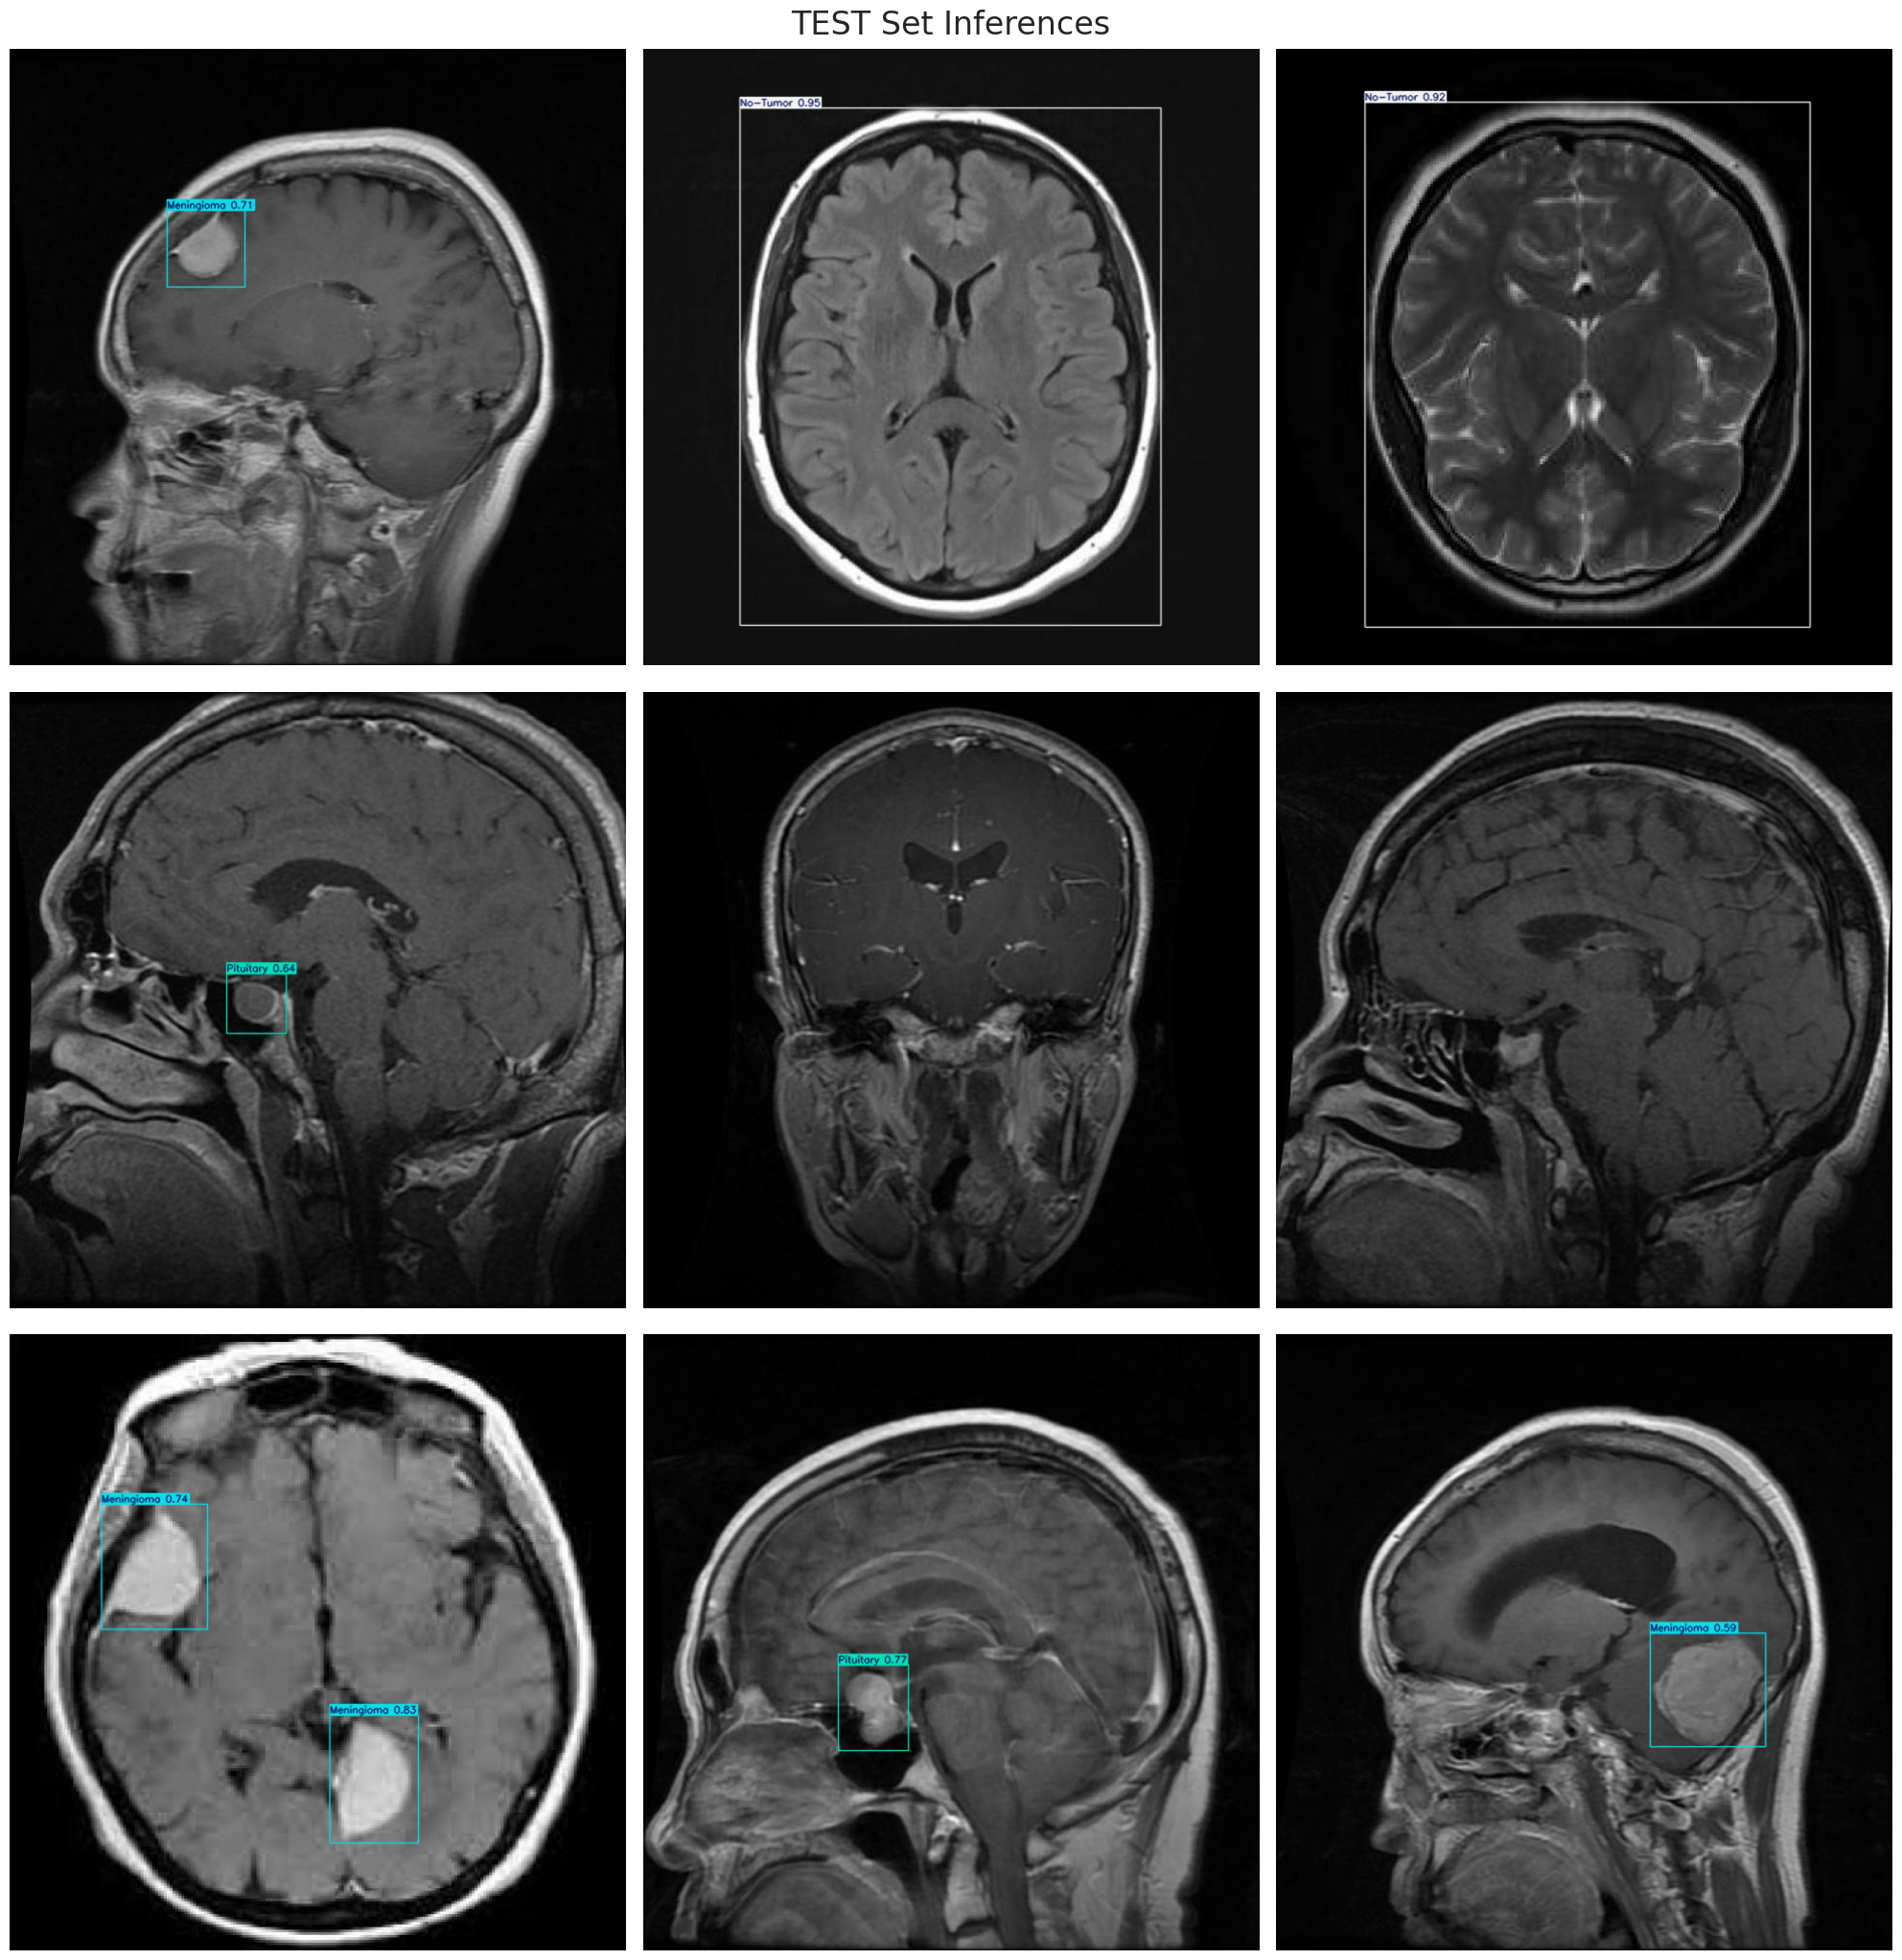

In [12]:
# Validation of Model by TestSet

# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/Brain-Tumor-Detection-2'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('TEST Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [15]:
import shutil
shutil.make_archive('/content/runs', 'zip', '/content/runs')

'/content/runs.zip'